<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. Importing Libraries
</span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('precision',3)

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Importing Power Generation & Weather Sensor Data
</span>

In [4]:
generation_data = pd.read_csv('../input/solar-power/Plant_2_Generation_Data.csv')

In [5]:
weather_data = pd.read_csv('../input/solar-power/Plant_2_Weather_Sensor_Data.csv')

In [6]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
39678,2020-06-04 17:30:00,4136001,NgDl19wMapZy17u,145.664,142.136,6247.429,111667416.429
38867,2020-06-04 08:15:00,4136001,Quc1TzYxW2pYoWX,460.573,452.067,379.267,329596949.267
55035,2020-06-12 00:00:00,4136001,PeE6FRyGXUgsRhN,0.000,0.000,3834.000,1348518245.000
21305,2020-05-26 09:45:00,4136001,PeE6FRyGXUgsRhN,932.607,911.887,1754.467,1348423761.467
66221,2020-06-17 07:00:00,4136001,vOuJvMaM2sgwLmb,65.573,63.507,41.600,2423410.600


In [7]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
449,2020-05-19 16:45:00,4136001,iq8k7ZNt4Mwm3w0,24.308,22.346,0.028
1995,2020-06-04 20:00:00,4136001,iq8k7ZNt4Mwm3w0,25.415,24.773,0.000
2691,2020-06-12 02:00:00,4136001,iq8k7ZNt4Mwm3w0,22.752,22.362,0.000
481,2020-05-20 00:45:00,4136001,iq8k7ZNt4Mwm3w0,24.774,23.075,0.000
2818,2020-06-13 09:45:00,4136001,iq8k7ZNt4Mwm3w0,27.204,40.380,0.607


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Adjust datetime format
</span>

In [8]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Merging generation data and weather sensor data  
</span>

In [9]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
21199,2020-05-26 08:15:00,Quc1TzYxW2pYoWX,484.486,475.086,463.857,329551822.857,29.114,42.419,0.467
60247,2020-06-14 11:15:00,Mx2yZCDsyf6DPfv,0.000,0.000,1705.000,2669142.000,31.797,50.921,0.783
21712,2020-05-26 15:30:00,4UPUqMRk7TRMgml,815.820,798.433,8456.667,2515281.667,35.714,48.472,0.544
36797,2020-06-03 08:30:00,PeE6FRyGXUgsRhN,499.773,489.980,527.267,1348468843.267,26.487,33.678,0.349
56465,2020-06-12 16:15:00,PeE6FRyGXUgsRhN,236.267,231.733,4293.533,1348522538.533,27.816,32.436,0.158


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Adding separate time and date columns  
</span>

In [10]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [11]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

In [12]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000
mean,246.702,241.278,3294.890,658944788.424,27.987,32.607,0.229,15.531,5.530,22.563,22.517,714.330
std,370.570,362.112,2919.448,729667771.073,4.021,11.226,0.309,8.528,0.499,1.475,16.764,415.672
min,0.000,0.000,0.000,0.000,20.942,20.265,0.000,1.000,5.000,20.000,0.000,0.000
25%,0.000,0.000,272.750,19964944.867,24.570,23.686,0.000,9.000,5.000,21.000,15.000,360.000
50%,0.000,0.000,2911.000,282627587.000,26.910,27.434,0.019,16.000,6.000,23.000,30.000,720.000
75%,446.592,438.215,5534.000,1348495113.000,30.913,40.019,0.431,22.000,6.000,24.000,45.000,1080.000
max,1420.933,1385.420,9873.000,2247916295.000,39.182,66.636,1.099,31.000,6.000,25.000,45.000,1425.000


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">6. Converting 'SOURCE_KEY' from categorical form to numerical form
</span>

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Data Visualization: </h1>

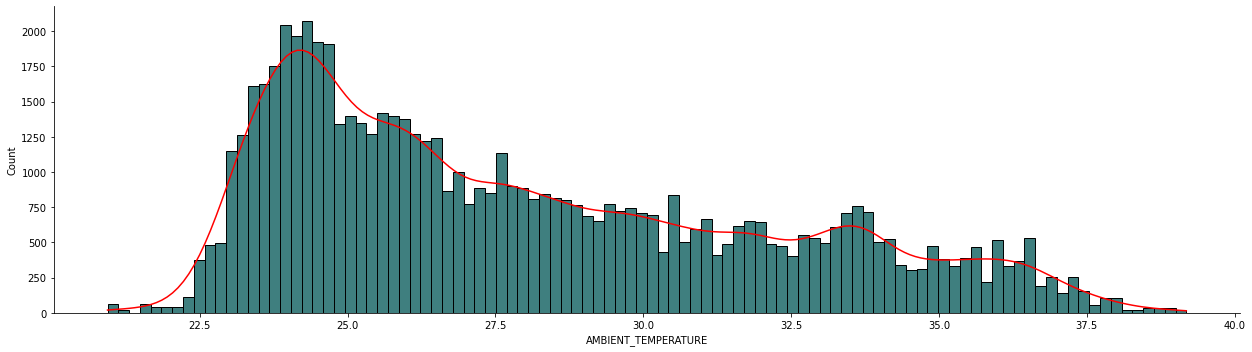

In [14]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [15]:
df_solar['DATE'].nunique()

34

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">7. Multiple Plotting of DC_POWER generation on per day basis.
</span>

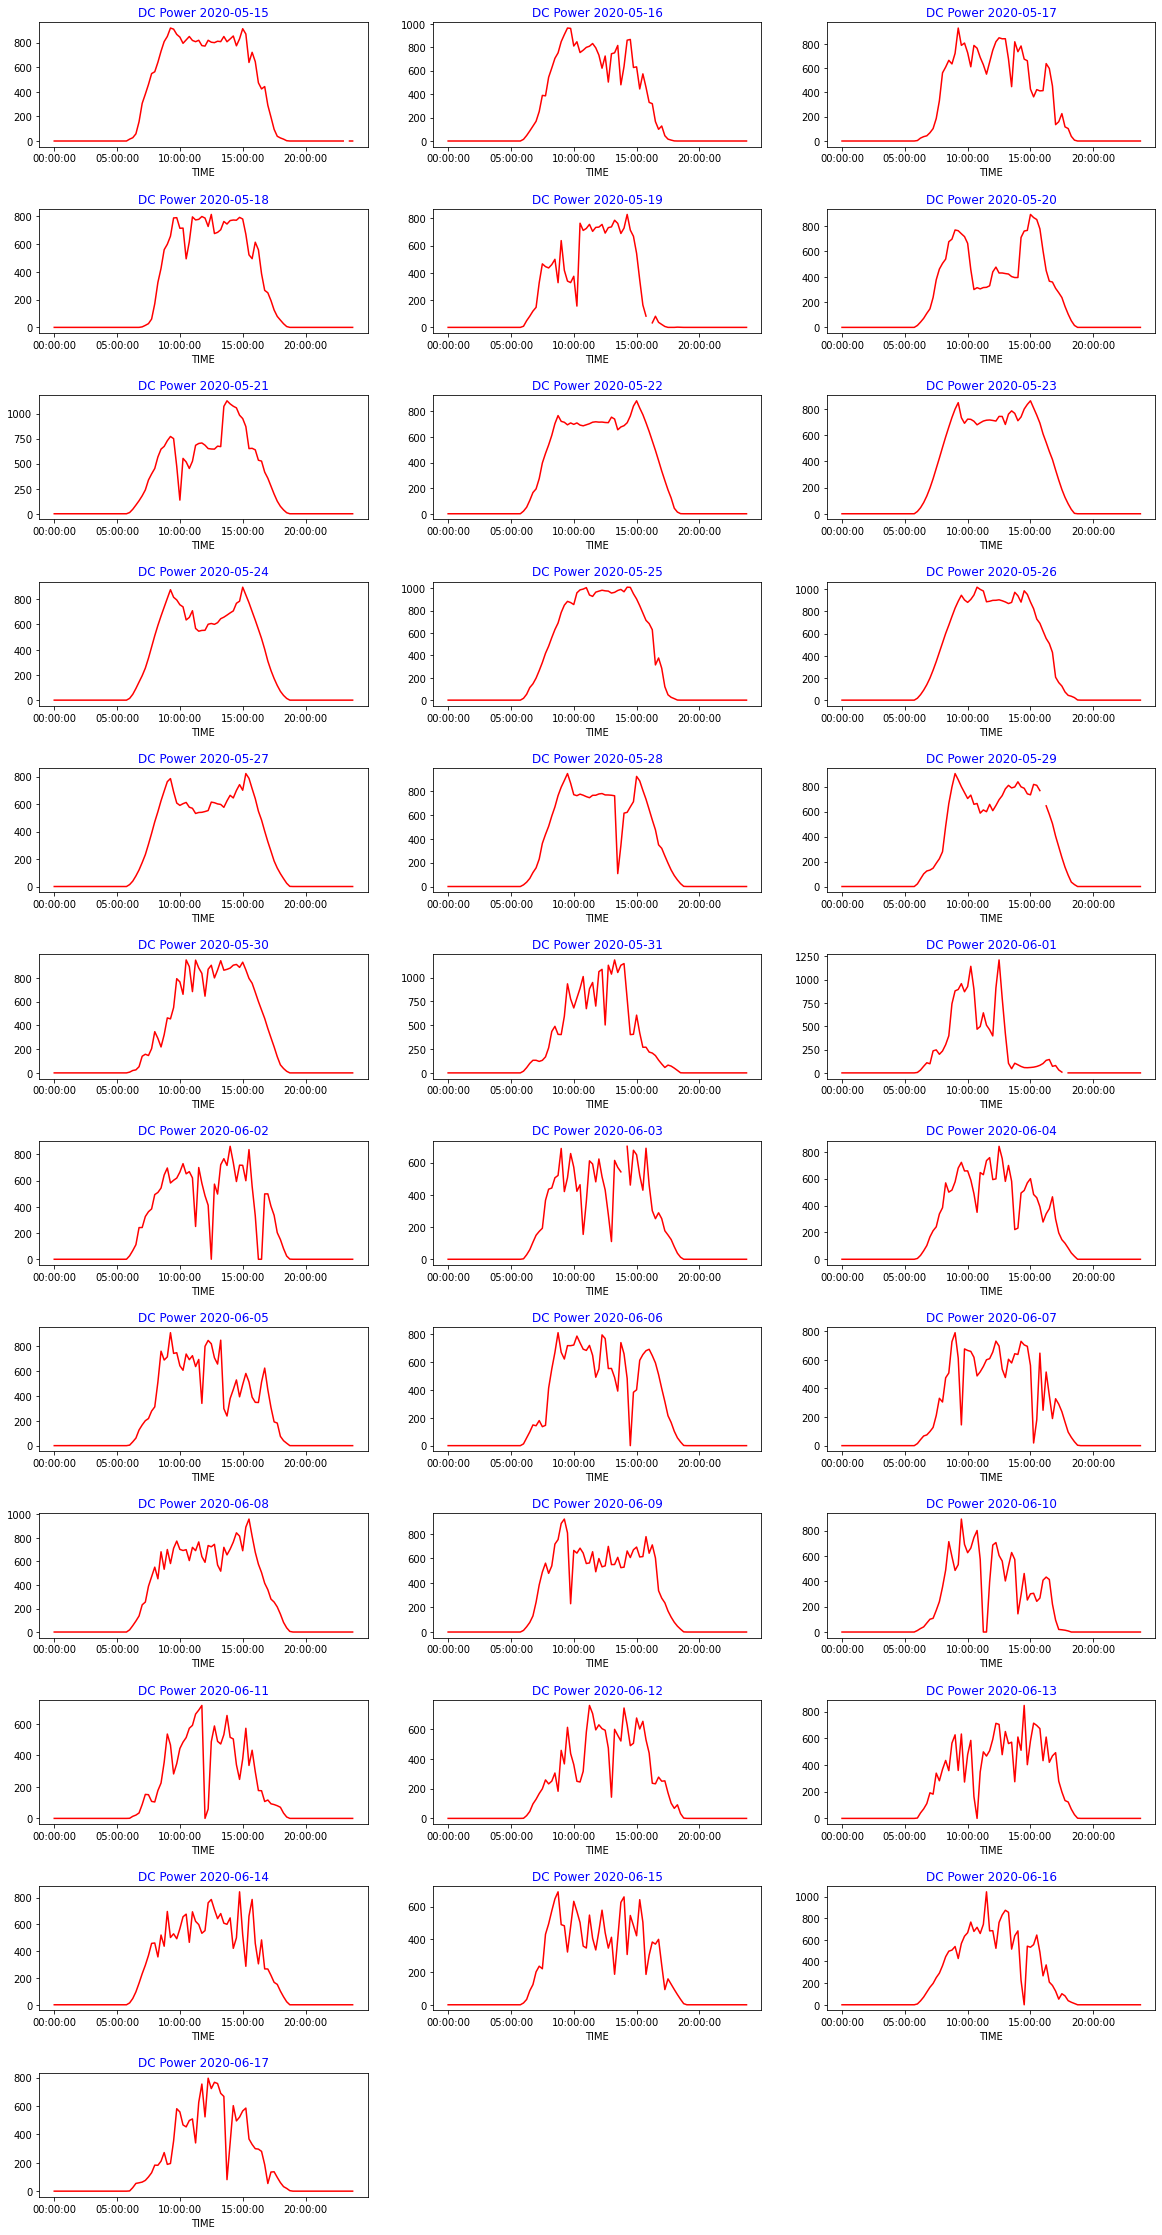

In [16]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

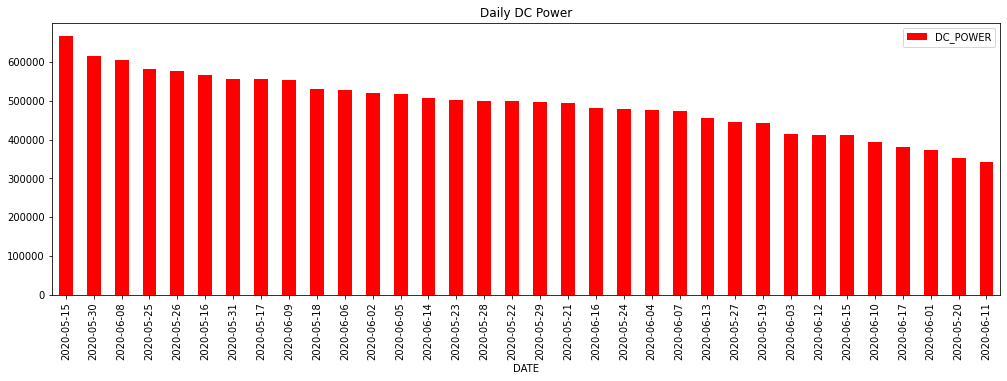

In [17]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

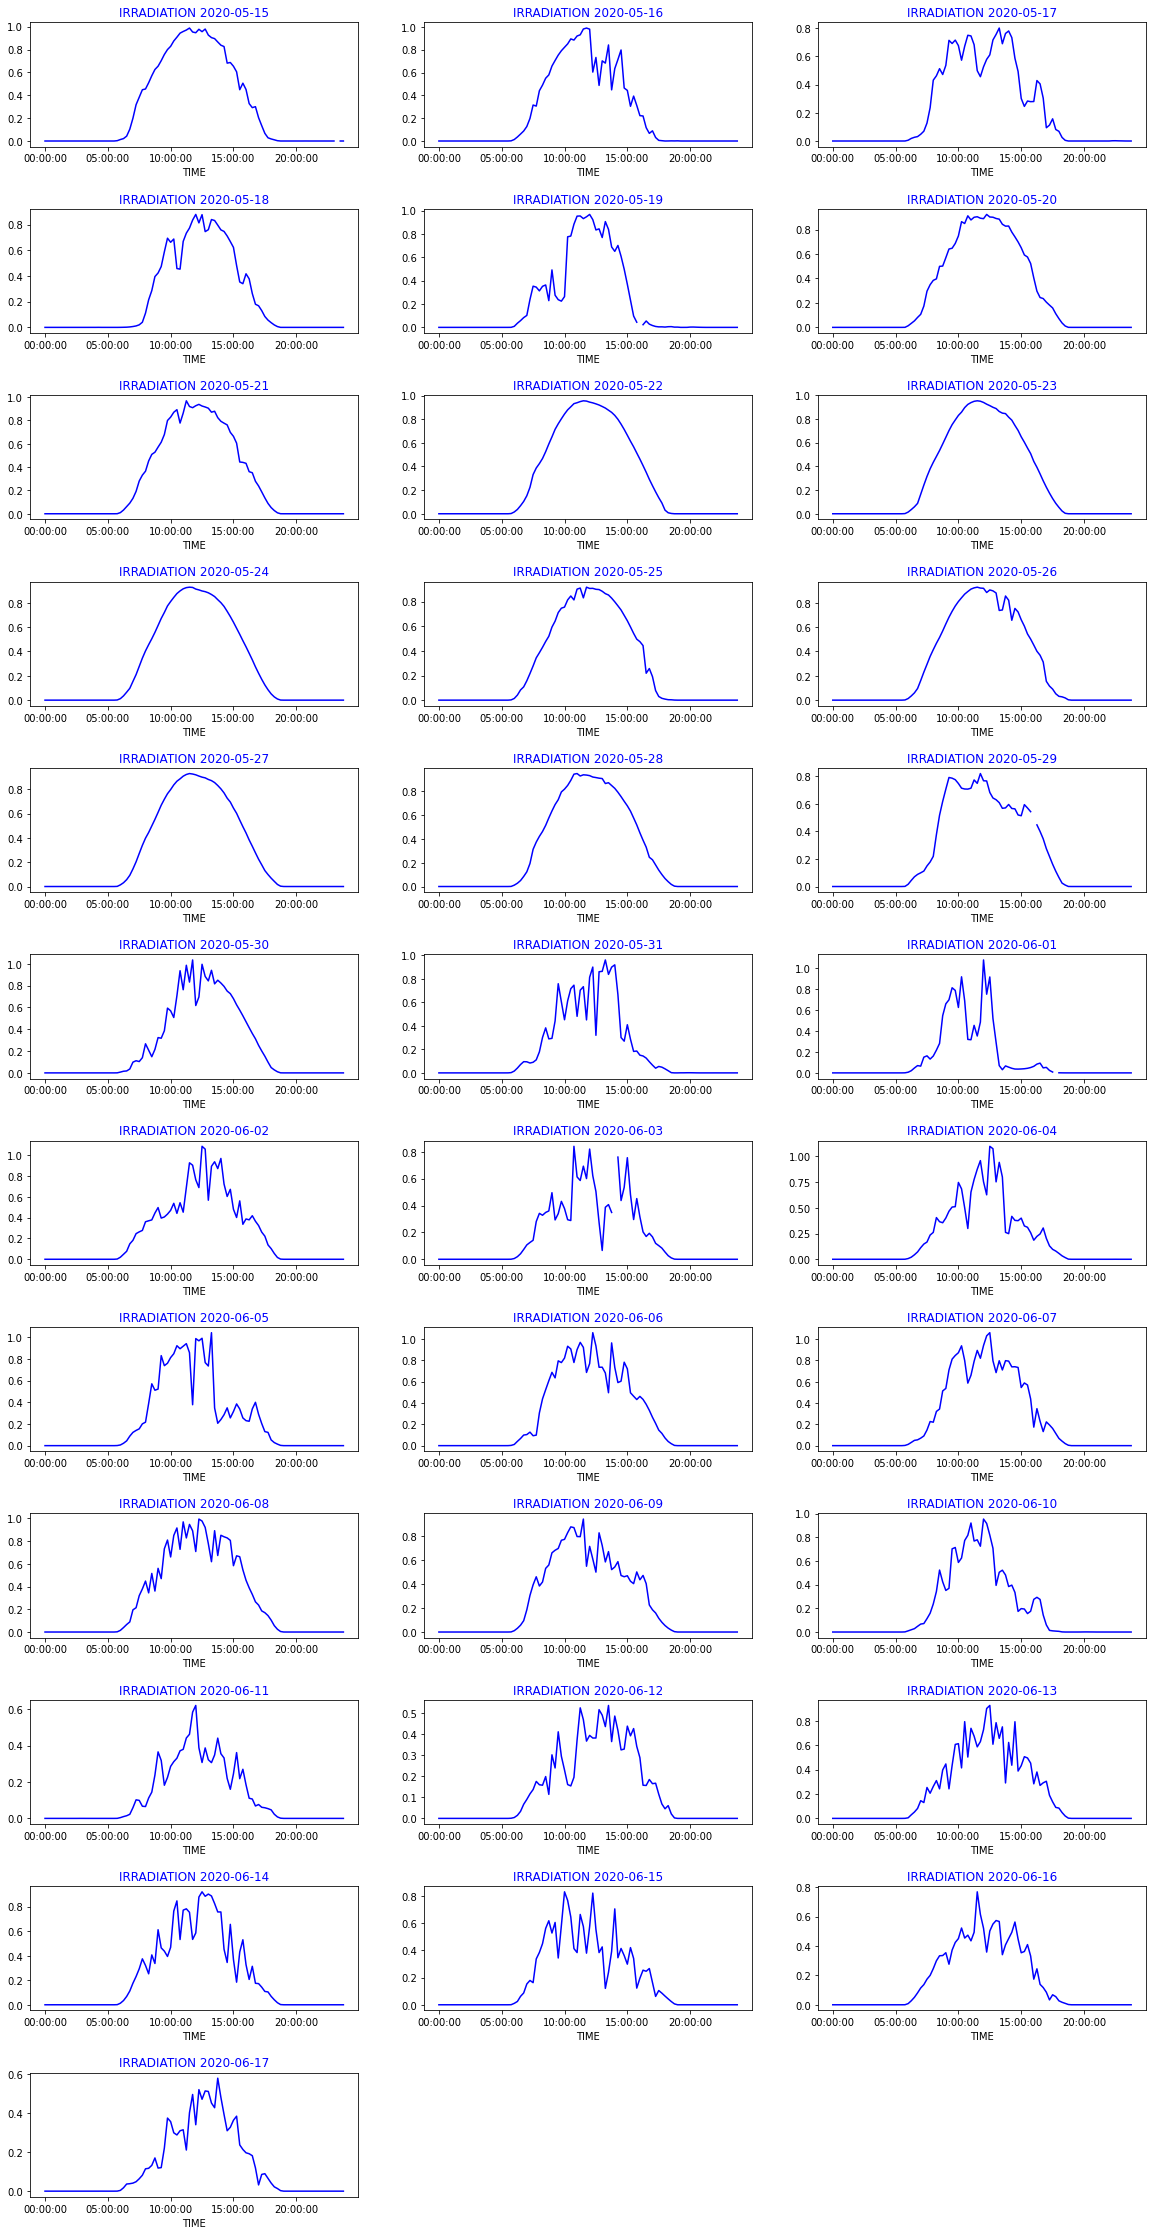

In [18]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

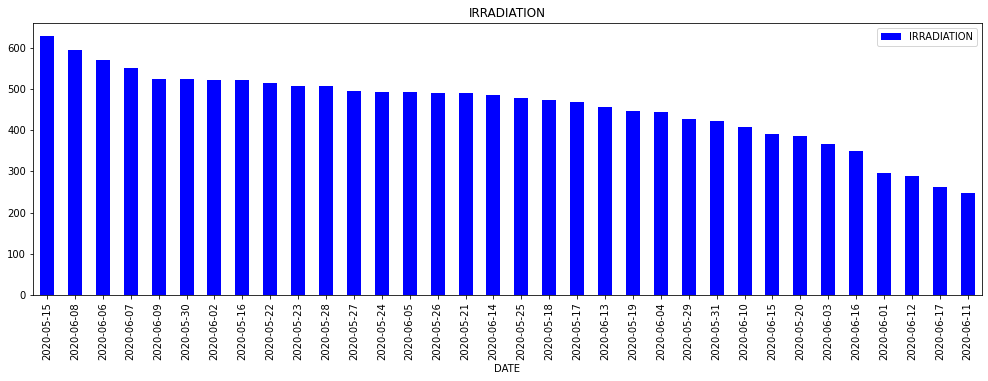

In [19]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

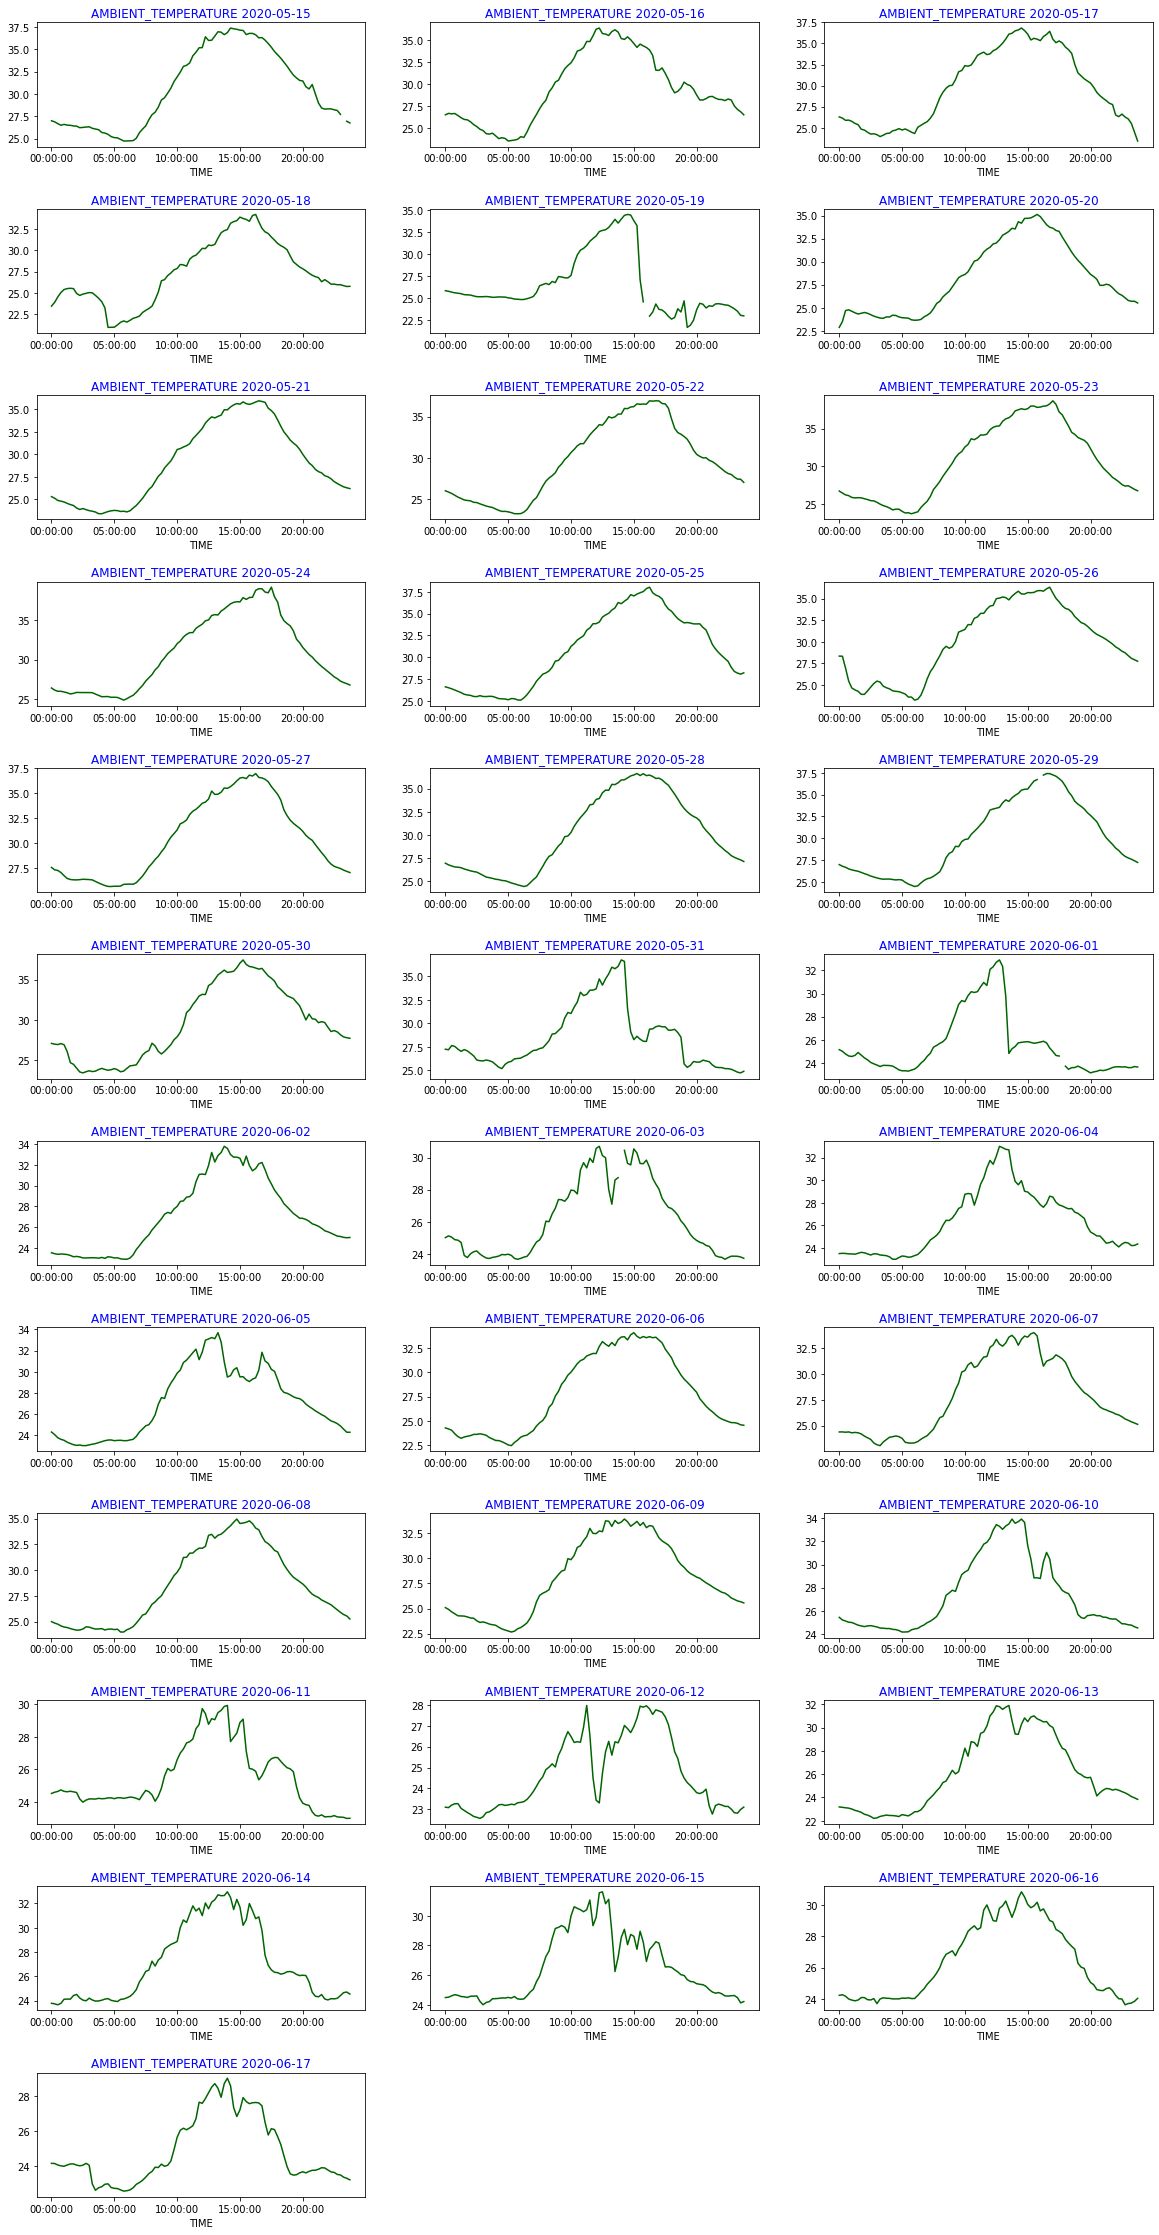

In [20]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

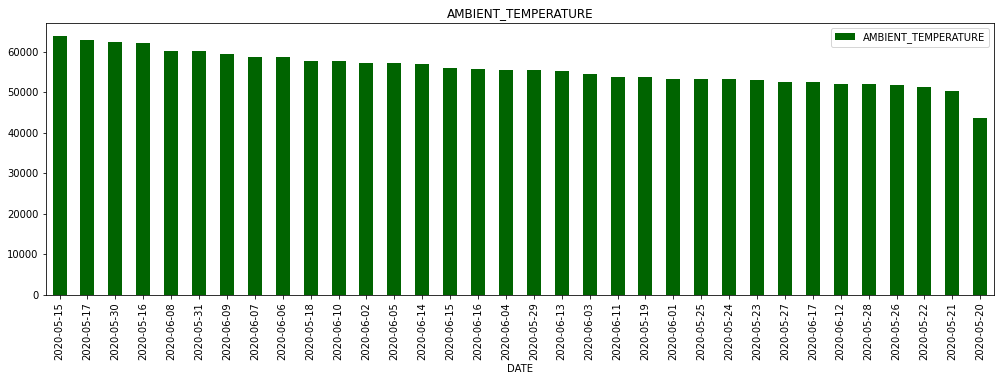

In [21]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">9. Highest average DC_POWER is generated on "2020-05-15"  
</span>

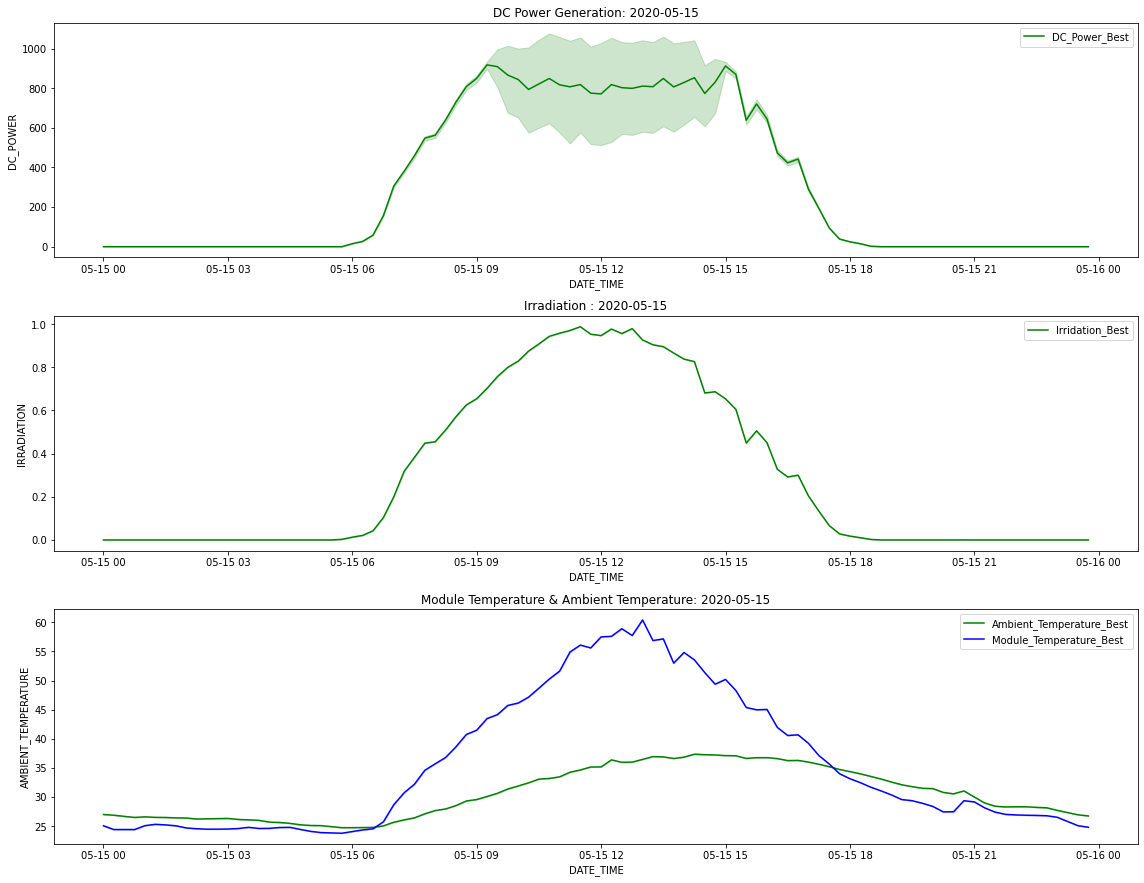

In [22]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">10. Lowest average DC_POWER is generated on "2020-06-11"  
</span>

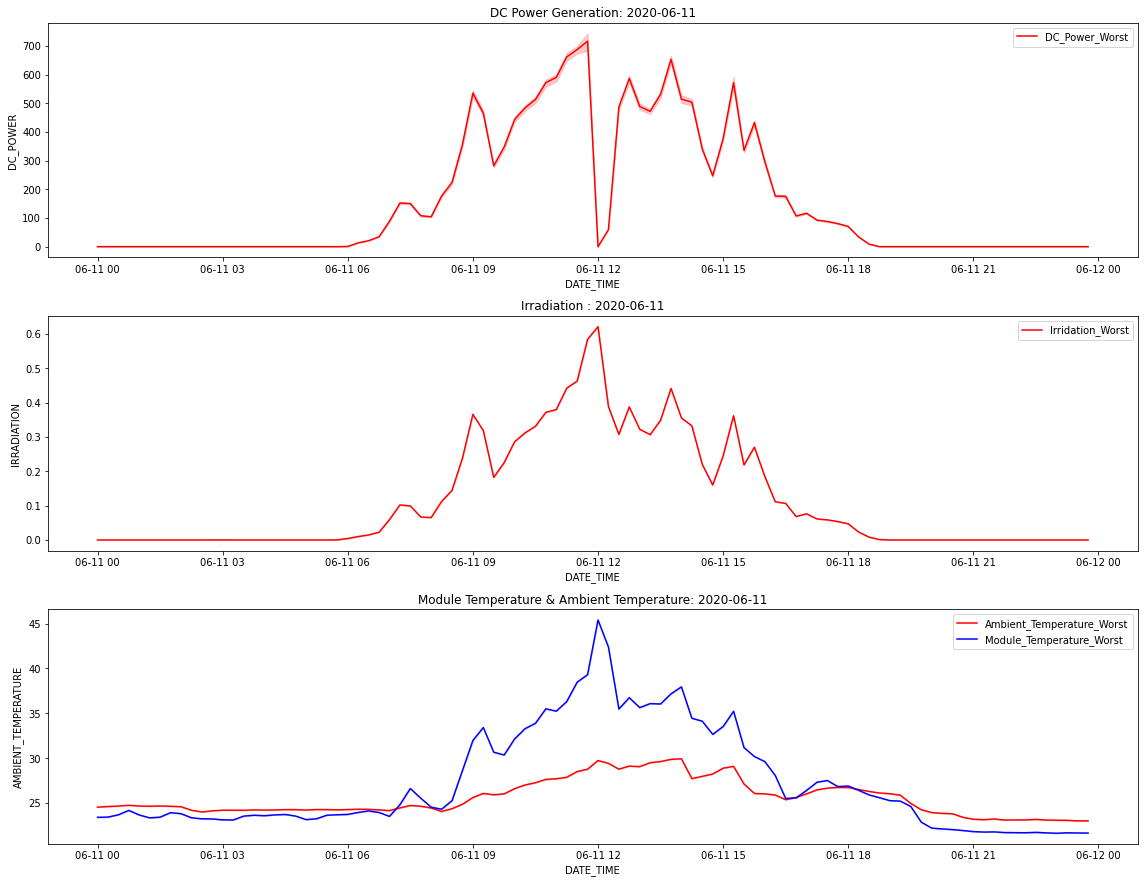

In [23]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

In [24]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [25]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">11. What does inverter efficiency mean?
</span>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Prediction</h1>

In [26]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
y = df2['AC_POWER']

In [27]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,9425.000,2.429e+06,27.005,25.061,0.0
1,0.000,1.215e+09,27.005,25.061,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0
3,269.933,1.704e+06,27.005,25.061,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0


In [28]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. LinearRegression
</span>

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_clf.predict(X_test)

# Calculate R² score
score_lr = 100 * lr_clf.score(X_test, y_test)
print(f'LR Model R² Score = {score_lr:.4f}%')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) = {mse:.4f}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE) = {rmse:.4f}')

LR Model R² Score = 61.3383%
Mean Squared Error (MSE) = 50252.2816
Root Mean Squared Error (RMSE) = 224.1702


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. RandomForestRegressor
</span>

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Initialize and train the Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfr = rfr.predict(X_test)

# Calculate R² score
r2_score_rfr = round(r2_score(y_test, y_pred_rfr) * 100, 2)
print("R² Score: ", r2_score_rfr, "%")

# Calculate Mean Squared Error (MSE)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("Mean Squared Error (MSE): ", round(mse_rfr, 4))

# Calculate Root Mean Squared Error (RMSE)
rmse_rfr = np.sqrt(mse_rfr)
print("Root Mean Squared Error (RMSE): ", round(rmse_rfr, 4))

R² Score:  93.85 %
Mean Squared Error (MSE):  7994.0654
Root Mean Squared Error (RMSE):  89.4095


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. DecisionTreeRegressor
</span>

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize and train the Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtr = dtr.predict(X_test)

# Calculate R² score
r2_score_dtr = round(r2_score(y_test, y_pred_dtr) * 100, 2)
print("R² Score: ", r2_score_dtr, "%")

# Calculate Mean Squared Error (MSE)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error (MSE): ", round(mse_dtr, 4))

# Calculate Root Mean Squared Error (RMSE)
rmse_dtr = np.sqrt(mse_dtr)
print("Root Mean Squared Error (RMSE): ", round(rmse_dtr, 4))

R² Score:  88.9 %
Mean Squared Error (MSE):  14428.436
Root Mean Squared Error (RMSE):  120.1184


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df2 is already defined and cleaned
X = df2[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df2['AC_POWER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Initialize base models (Linear Regression, Random Forest, Gradient Boosting)
base_learners = [
    ('lr', LinearRegression()),
    ('rfr', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Initialize the Stacking Regressor (meta-model)
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=LinearRegression()  # Meta-model could also be RandomForestRegressor or another model
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Calculate MSE and RMSE for the stacking model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

# Calculate R² score
r2_stacking = stacking_model.score(X_test, y_test) * 100

# Print the results for the stacking model
print(f"Stacking Model (LR Meta-Model) - MSE: {mse_stacking:.4f}, RMSE: {rmse_stacking:.4f}, R²: {r2_stacking:.4f}%")

Stacking Model (LR Meta-Model) - MSE: 7945.5703, RMSE: 89.1379, R²: 93.8871%


In [48]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define hyperparameter grids for each model
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

lgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'num_leaves': [31, 50, 70, 90],
    'subsample': [0.8, 0.9, 1.0]
}

cat_param_grid = {
    'iterations': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [6, 7, 8, 9, 10],
    'l2_leaf_reg': [1, 3, 5, 7]
}

svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# Initialize models
xgb_model = xgb.XGBRegressor(random_state=42)
lgb_model = lgb.LGBMRegressor(random_state=42)
cat_model = cb.CatBoostRegressor(verbose=0, random_seed=42)
svr_model = SVR()

# Hyperparameter tuning using RandomizedSearchCV
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
lgb_search = RandomizedSearchCV(lgb_model, lgb_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
cat_search = RandomizedSearchCV(cat_model, cat_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
svr_search = RandomizedSearchCV(svr_model, svr_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the models
xgb_search.fit(X_train, y_train)
lgb_search.fit(X_train, y_train)
cat_search.fit(X_train, y_train)
svr_search.fit(X_train, y_train)

# Print best parameters for each model
print("Best XGBoost Parameters: ", xgb_search.best_params_)
print("Best LightGBM Parameters: ", lgb_search.best_params_)
print("Best CatBoost Parameters: ", cat_search.best_params_)
print("Best SVR Parameters: ", svr_search.best_params_)

# Use the best models from the search
xgb_best = xgb_search.best_estimator_
lgb_best = lgb_search.best_estimator_
cat_best = cat_search.best_estimator_
svr_best = svr_search.best_estimator_

# Define meta-model (GradientBoostingRegressor)
meta_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Stacking Model: Combine Base Models and Meta-Model
ensemble_stacking_model = StackingRegressor(
    estimators=[('xgb', xgb_best), ('lgb', lgb_best), ('cat', cat_best), ('svr', svr_best)],
    final_estimator=meta_model
)

# Fit Ensemble Stacking Model
ensemble_stacking_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_ensemble_stacking = ensemble_stacking_model.predict(X_test)

# Calculate MSE and RMSE for the ensemble stacking model
mse_ensemble_stacking = mean_squared_error(y_test, y_pred_ensemble_stacking)
rmse_ensemble = np.sqrt(mse_ensemble_stacking)

# Calculate R² for the ensemble stacking model
r2_ensemble = ensemble_stacking_model.score(X_test, y_test) * 100

# Print the results for the ensemble stacking model
print(f"Ensemble Stacking Model - MSE: {mse_ensemble_stacking:.4f}, RMSE: {rmse_ensemble:.4f}, R²: {r2_ensemble:.4f}%")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Parameters:  {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best LightGBM Parameters:  {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.2}
Best CatBoost Parameters:  {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 400, 'depth': 8}
Best SVR Parameters:  {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Ensemble Stacking Model - MSE: 6274.4520, RMSE: 79.2114, R²: 95.1727%


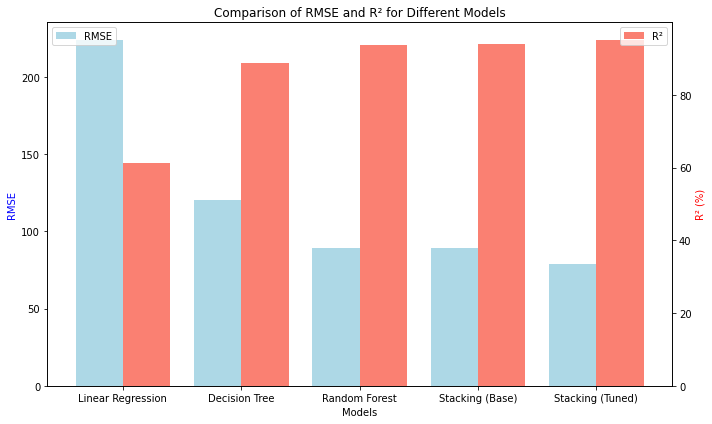

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Store RMSE and R² values for the models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Stacking (Base)', 'Ensemble Stacking (Tuned)']
rmse_values = [rmse, rmse_dtr, rmse_rfr,rmse_stacking,rmse_ensemble]  # RMSE for each model
r2_values = [score_lr, r2_score_dtr, r2_score_rfr, r2_stacking, r2_ensemble]  # R² for each model

# Define the positions for the bars
x = np.arange(len(models))

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar plot for RMSE
bar_rmse = ax1.bar(x - 0.2, rmse_values, 0.4, label='RMSE', color='lightblue')

# Create secondary axis for R² (percentage)
ax2 = ax1.twinx()
bar_r2 = ax2.bar(x + 0.2, r2_values, 0.4, label='R²', color='salmon')

# Set the labels for the x-axis, y-axis, and title
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color='blue')
ax2.set_ylabel('R² (%)', color='red')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Comparison of RMSE and R² for Different Models')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()